# 0. Loading packages

If not all libraries are installed, uncomment the cell below

In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import warnings 

warnings.filterwarnings('ignore')

from functions import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa

from os import listdir

pd.set_option('display.max_columns', None)

### Kaggle

Group 1

Jenewein Matthias - Jenewein Matthias

Kalarickal Dominic - Kalarickal Dominic

Leander Leirissa - Bitterzoet

Timmer Lars - laltir

# 1. Loading data

In [3]:
labeled_files = os.listdir('Datasets/labeled')
unlabeled_files = os.listdir('Datasets/unlabeled')

print("Labeled files:", labeled_files)
print("Unlabeled files:", unlabeled_files)

Labeled files: ['m00002.wav', 'm00039.wav', 'm00041.wav', 'm00072.wav', 'm00096.wav', 'm00102.wav', 'm00112.wav', 'm00138.wav', 'm00192.wav', 'm00206.wav', 'm00230.wav', 'm00236.wav', 'm00248.wav', 'm00253.wav', 'm00298.wav', 'm00313.wav', 'm00338.wav', 'm00339.wav', 'm00351.wav', 'm00400.wav', 'm00421.wav', 'm00429.wav', 'm00435.wav', 'm00454.wav', 'm00477.wav', 'm00501.wav', 'm00503.wav', 'm00513.wav', 'm00553.wav', 'm00606.wav', 'm00623.wav', 'm00627.wav', 'm00629.wav', 'm00633.wav', 'm00637.wav', 'm00658.wav', 'm00671.wav', 'm00676.wav', 'm00677.wav', 'm00678.wav', 'm00716.wav', 'm00762.wav', 'm00772.wav', 'm00773.wav', 'm00801.wav', 'm00821.wav', 'm00850.wav', 'm00867.wav', 'm00895.wav', 'm00996.wav']
Unlabeled files: ['m00003.wav', 'm00012.wav', 'm00013.wav', 'm00043.wav', 'm00044.wav', 'm00055.wav', 'm00061.wav', 'm00063.wav', 'm00069.wav', 'm00074.wav', 'm00107.wav', 'm00114.wav', 'm00127.wav', 'm00137.wav', 'm00139.wav', 'm00148.wav', 'm00149.wav', 'm00156.wav', 'm00183.wav', 

In [4]:
labeled_files = [f for f in os.listdir("Datasets/labeled") if f.endswith(".wav")]
# or do a quick check:
for f in labeled_files:
    print(repr(f))  

'm00002.wav'
'm00039.wav'
'm00041.wav'
'm00072.wav'
'm00096.wav'
'm00102.wav'
'm00112.wav'
'm00138.wav'
'm00192.wav'
'm00206.wav'
'm00230.wav'
'm00236.wav'
'm00248.wav'
'm00253.wav'
'm00298.wav'
'm00313.wav'
'm00338.wav'
'm00339.wav'
'm00351.wav'
'm00400.wav'
'm00421.wav'
'm00429.wav'
'm00435.wav'
'm00454.wav'
'm00477.wav'
'm00501.wav'
'm00503.wav'
'm00513.wav'
'm00553.wav'
'm00606.wav'
'm00623.wav'
'm00627.wav'
'm00629.wav'
'm00633.wav'
'm00637.wav'
'm00658.wav'
'm00671.wav'
'm00676.wav'
'm00677.wav'
'm00678.wav'
'm00716.wav'
'm00762.wav'
'm00772.wav'
'm00773.wav'
'm00801.wav'
'm00821.wav'
'm00850.wav'
'm00867.wav'
'm00895.wav'
'm00996.wav'


In [48]:
dl = DataLoader()

labeled_data = dl.get_data(labeled_files, path='Datasets/labeled', max_workers=6)
unlabeled_data = dl.get_data(unlabeled_files, path='Datasets/unlabeled', max_workers=6)

# 2. Data exploration

In [6]:
display(labeled_data.head())
display(labeled_data.tail())

,m00102.wav,m00112.wav,m00096.wav,m00138.wav,m00192.wav,m00206.wav,m00230.wav,m00236.wav,m00248.wav,m00253.wav,m00298.wav,m00313.wav,m00338.wav,m00339.wav,m00351.wav,m00400.wav,m00421.wav,m00429.wav,m00435.wav,m00454.wav,m00477.wav,m00501.wav,m00503.wav,m00513.wav,m00553.wav,m00606.wav,m00623.wav,m00627.wav,m00629.wav,m00633.wav,m00637.wav,m00658.wav,m00671.wav,m00676.wav,m00677.wav,m00678.wav,m00716.wav,m00762.wav,m00772.wav,m00773.wav,m00801.wav,m00821.wav,m00850.wav,m00867.wav,m00895.wav,m00996.wav,m00041.wav,m00002.wav,m00072.wav,m00039.wav
0,0.007843,-0.002625,-0.036072,-0.026306,0.069672,-0.111206,0.120087,-0.006622,0.051422,-0.236969,0.046478,-0.033386,-0.213593,0.059265,0.090729,0.042816,-0.121704,0.282593,-0.072723,-0.157288,-0.000366,-0.281555,0.022217,-0.094635,-0.081451,0.037262,0.284760,0.037415,0.090332,0.065186,0.249695,-0.010315,-0.133453,0.357910,-0.177551,-0.062012,-0.032074,-0.158539,-0.034149,0.061676,0.062622,-0.187012,-0.189209,0.072723,0.048950,-0.063629,0.078033,-0.016357,0.106079,-0.094788
1,0.007263,-0.003754,-0.105682,-0.028778,0.065948,-0.198212,0.170898,-0.009186,0.070953,-0.296875,0.063995,-0.050201,-0.357239,0.063324,0.138855,0.067963,-0.118591,0.357483,-0.125763,-0.273651,-0.002869,-0.360931,0.029694,-0.114075,-0.068909,0.029816,0.240753,-0.072571,0.119537,0.103699,0.380066,-0.001038,-0.126984,0.397919,-0.238892,-0.064758,-0.057587,-0.155304,-0.038361,0.061035,0.059814,-0.113556,-0.242401,0.103699,0.016876,-0.037994,-0.037659,-0.022827,0.084961,-0.153381
2,0.005829,-0.003876,-0.201233,-0.013489,0.042389,-0.139313,0.117401,-0.006104,0.023956,-0.080994,0.043274,-0.031281,-0.314301,0.033295,0.082733,0.060791,-0.126831,0.162445,-0.119934,-0.235016,-0.005310,-0.401917,0.032318,-0.135742,-0.023407,0.023865,0.319092,-0.114807,0.108215,0.078186,0.306458,0.016266,-0.122009,0.328705,-0.156708,0.012695,-0.045929,-0.159088,0.003082,0.060059,0.058044,-0.061249,-0.168579,0.102112,0.060913,-0.043274,0.126648,-0.014679,0.062103,-0.143921
3,0.004211,-0.003296,-0.279602,-0.010742,0.025787,-0.076721,0.033844,-0.006622,0.105255,-0.057129,0.038269,-0.032928,-0.318817,0.029419,0.024658,0.063019,-0.130829,0.125000,-0.123688,-0.214355,-0.006348,-0.418518,0.048889,-0.164124,-0.005432,0.006287,0.237976,-0.083191,0.155823,0.080322,0.294525,0.011810,-0.119202,0.266815,-0.175476,0.064789,-0.041931,-0.159302,0.021759,0.079346,0.060059,-0.056824,-0.084442,0.107117,0.076813,-0.060059,0.165619,-0.011780,0.050476,-0.153412
4,0.003113,-0.003601,-0.315582,0.001587,0.009857,-0.050323,0.023102,-0.007874,0.076111,-0.057953,0.028412,-0.038513,-0.360016,0.040466,-0.061005,0.063568,-0.136017,0.106567,-0.099884,-0.210754,-0.006653,-0.345856,0.057312,-0.177856,0.021484,-0.006744,0.310577,-0.068390,0.160858,0.079132,0.284973,0.004517,-0.118164,0.229553,-0.201569,0.100159,-0.048279,-0.161957,0.004822,0.078644,0.053528,-0.041870,-0.044495,0.104431,0.158356,-0.066376,0.029724,-0.006683,0.052216,-0.151947


,m00102.wav,m00112.wav,m00096.wav,m00138.wav,m00192.wav,m00206.wav,m00230.wav,m00236.wav,m00248.wav,m00253.wav,m00298.wav,m00313.wav,m00338.wav,m00339.wav,m00351.wav,m00400.wav,m00421.wav,m00429.wav,m00435.wav,m00454.wav,m00477.wav,m00501.wav,m00503.wav,m00513.wav,m00553.wav,m00606.wav,m00623.wav,m00627.wav,m00629.wav,m00633.wav,m00637.wav,m00658.wav,m00671.wav,m00676.wav,m00677.wav,m00678.wav,m00716.wav,m00762.wav,m00772.wav,m00773.wav,m00801.wav,m00821.wav,m00850.wav,m00867.wav,m00895.wav,m00996.wav,m00041.wav,m00002.wav,m00072.wav,m00039.wav
670335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.480865,NaN,NaN,NaN,NaN,NaN
670336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.416382,NaN,NaN,NaN,NaN,NaN
670337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.317200,NaN,NaN,NaN,NaN,NaN
670338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.331604,NaN,NaN,NaN,NaN,NaN
670339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.349121,NaN,NaN,NaN,NaN,NaN


<div style="border: 2px solid; background-color:rgb(255, 186, 186); color:rgb(255, 0, 0); padding: 10px; border-radius: 5px; display: inline-block; max-width: 97%;">
<strong>Warning:</strong> Write description
</div>

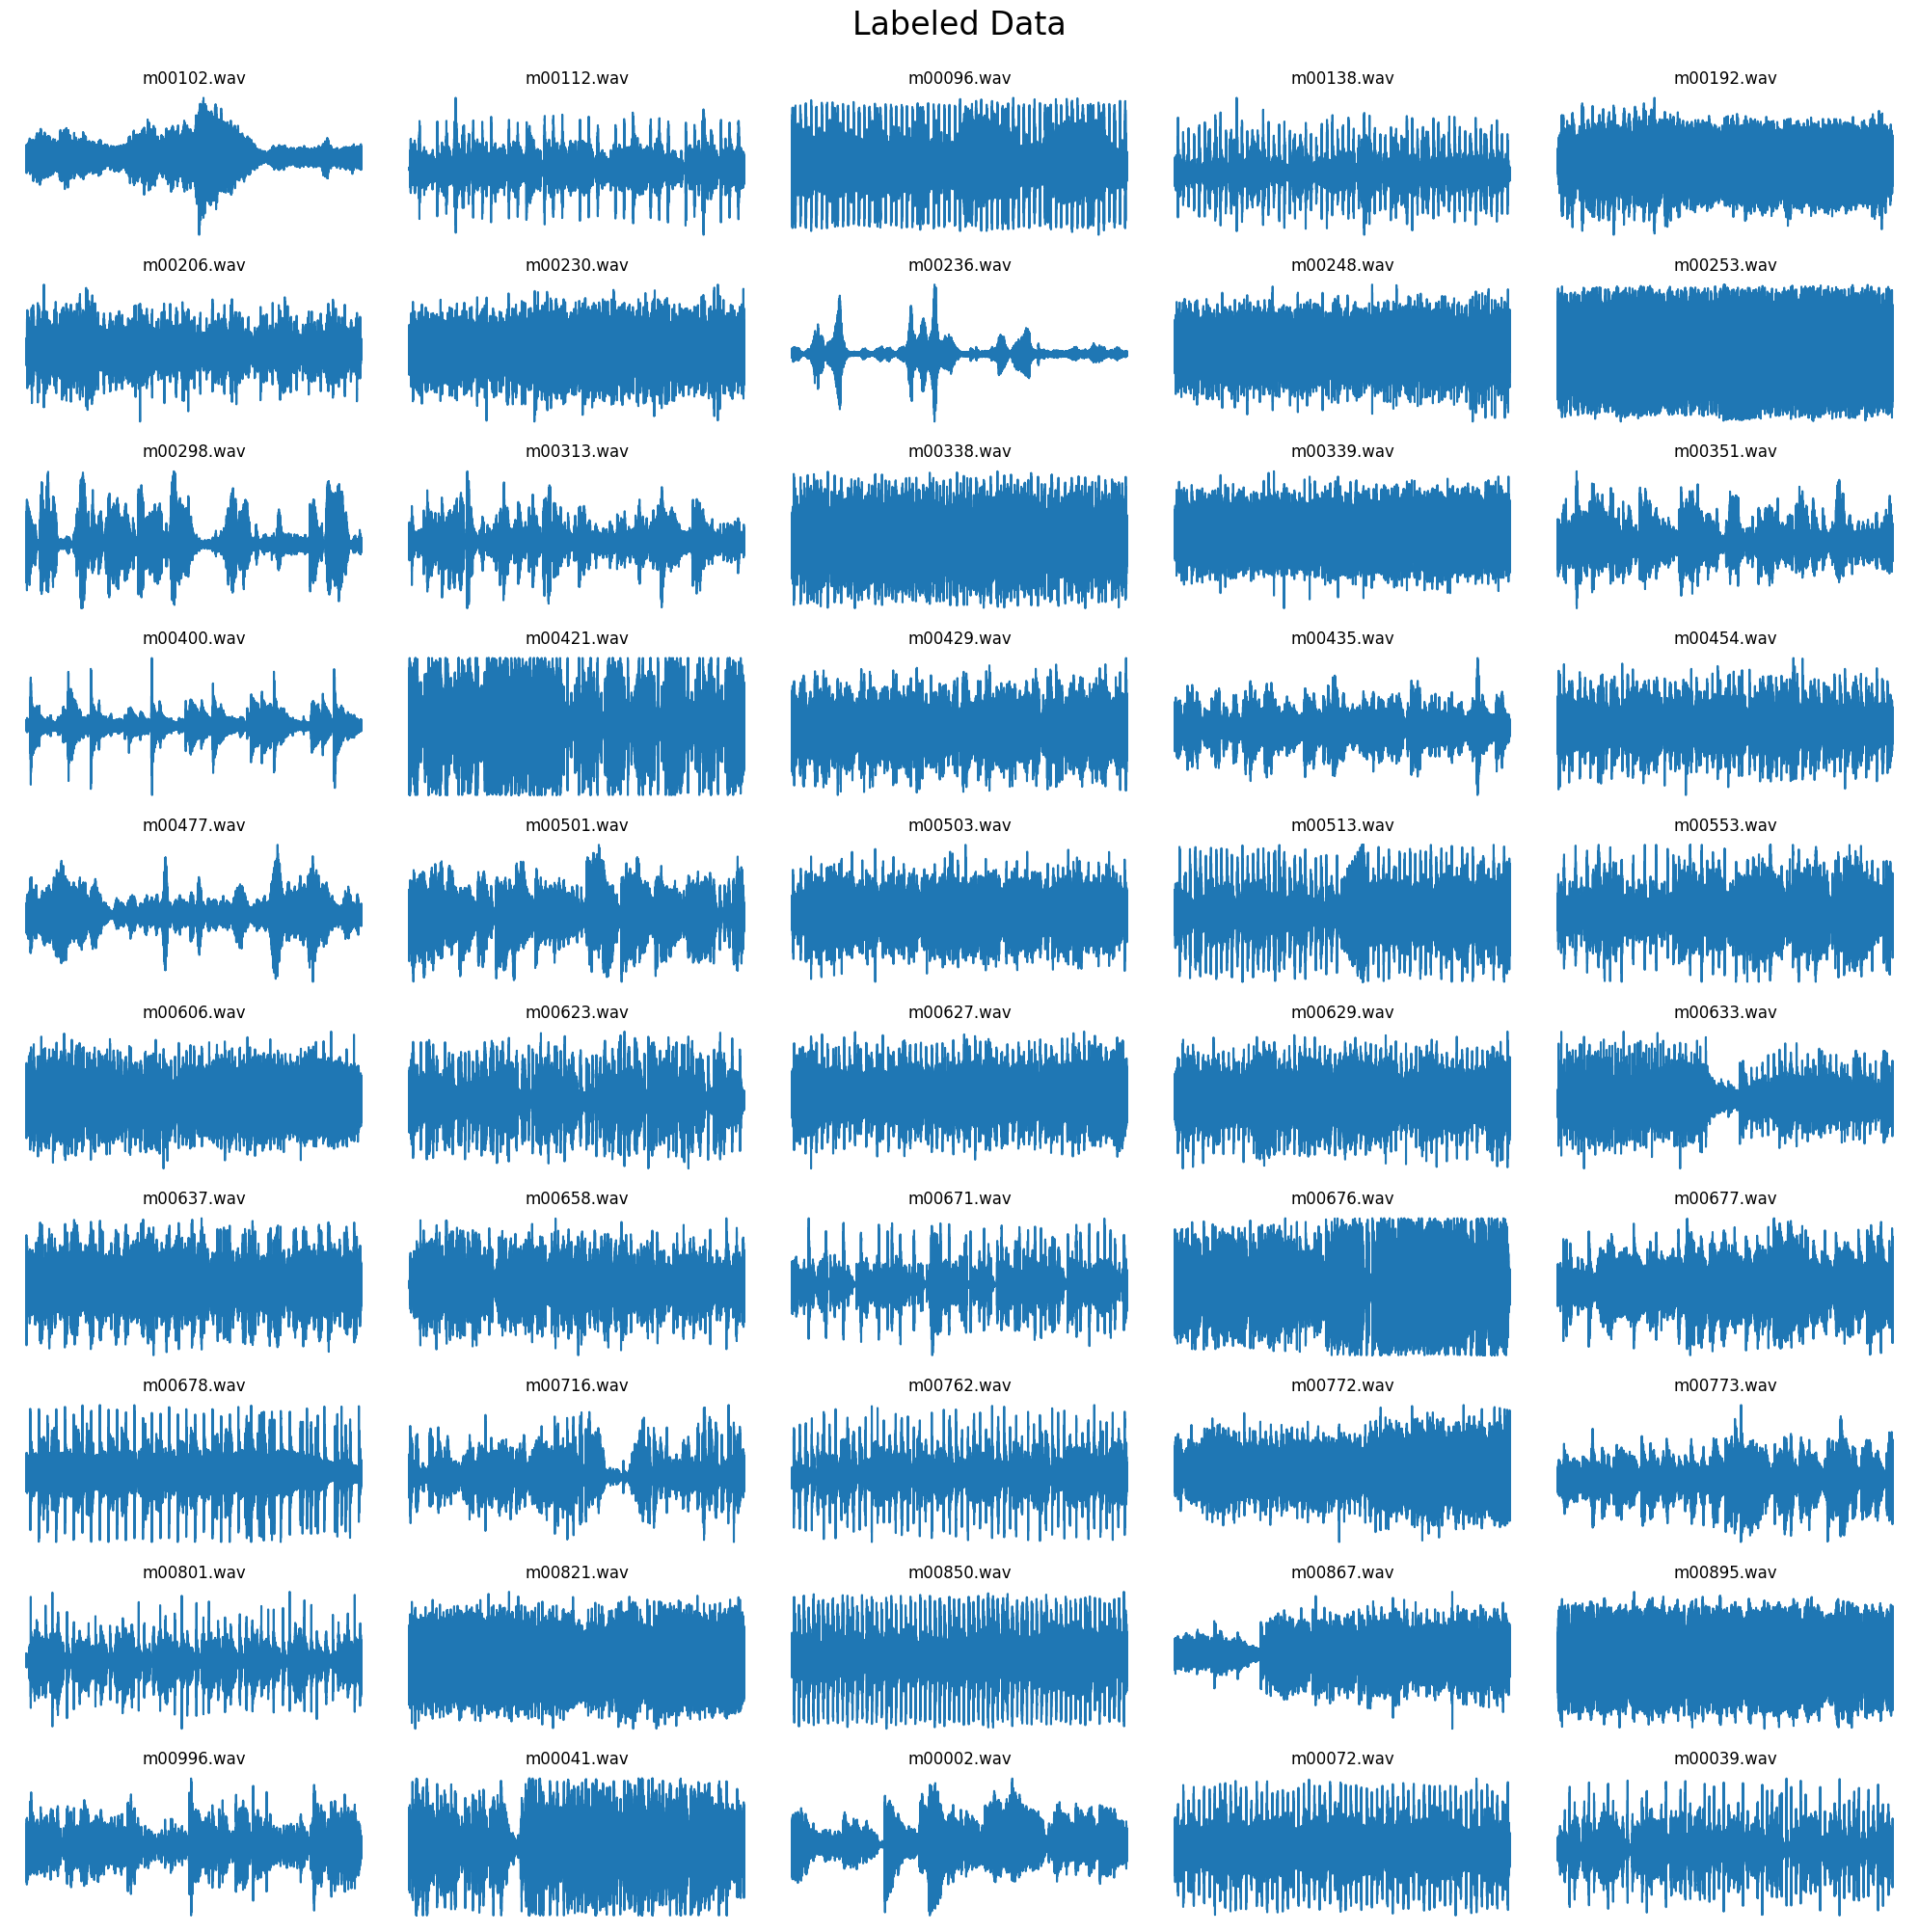

In [7]:
v_la = Visualizer(labeled_data, 'Labeled Data', 10, 5, figsize=(20, 20))
v_la.subplots()

In [8]:
display(unlabeled_data.head())
display(unlabeled_data.tail())

,m00003.wav,m00043.wav,m00061.wav,m00044.wav,m00063.wav,m00069.wav,m00074.wav,m00107.wav,m00114.wav,m00127.wav,m00137.wav,m00139.wav,m00148.wav,m00149.wav,m00156.wav,m00183.wav,m00211.wav,m00218.wav,m00228.wav,m00247.wav,m00254.wav,m00266.wav,m00289.wav,m00292.wav,m00293.wav,m00309.wav,m00318.wav,m00321.wav,m00323.wav,m00324.wav,m00012.wav,m00331.wav,m00348.wav,m00355.wav,m00013.wav,m00356.wav,m00055.wav,m00357.wav,m00359.wav,m00363.wav,m00371.wav,m00372.wav,m00391.wav,m00393.wav,m00399.wav,m00405.wav,m00414.wav,m00434.wav,m00463.wav,m00468.wav,m00487.wav,m00495.wav,m00515.wav,m00528.wav,m00537.wav,m00538.wav,m00549.wav,m00555.wav,m00560.wav,m00570.wav,m00571.wav,m00576.wav,m00581.wav,m00582.wav,m00589.wav,m00597.wav,m00610.wav,m00616.wav,m00624.wav,m00635.wav,m00685.wav,m00705.wav,m00708.wav,m00719.wav,m00730.wav,m00733.wav,m00736.wav,m00755.wav,m00756.wav,m00791.wav,m00806.wav,m00812.wav,m00817.wav,m00824.wav,m00828.wav,m00829.wav,m00833.wav,m00838.wav,m00843.wav,m00852.wav,m00873.wav,m00921.wav,m00927.wav,m00928.wav,m00941.wav,m00947.wav,m00949.wav,m00950.wav,m00961.wav,m00967.wav,m00971.wav,m00973.wav,m00988.wav,m00991.wav,m00995.wav
0,-0.129364,-0.115051,-0.115631,-0.017822,0.034790,0.001678,-0.208252,-0.029175,0.377899,-0.040497,-0.027100,0.028381,-0.029846,-0.226410,0.001678,-0.236969,-0.020874,0.295319,0.107208,0.037872,-0.042633,-0.024597,0.133667,0.023346,0.167694,0.026337,0.411072,-0.004120,-0.162201,0.007080,-0.003815,-0.009521,0.001801,-0.138641,0.004791,0.399872,-0.062683,0.005035,0.039581,-0.027832,0.621979,-0.027710,-0.242096,0.032013,0.039337,-0.003784,0.005646,0.006989,0.012970,0.001373,-0.001984,-0.068909,-0.269196,0.471375,0.000824,-0.079987,0.006012,-0.243866,0.044617,0.312714,-0.033386,0.049347,-0.018097,0.007080,-0.009491,0.010498,-0.079926,-0.016724,0.013275,-0.023010,-0.081268,0.019379,-0.181244,-0.034088,0.116486,0.255707,-0.030426,-0.421814,-0.039642,-0.181030,0.110107,-0.038971,-0.990753,0.068024,-0.401886,0.044983,0.108032,-0.019165,0.018097,-0.113861,0.015778,0.051178,0.010071,0.022705,-0.023621,-0.016937,-0.017700,0.041473,0.053528,-0.051880,-0.001007,0.106842,0.003845,-0.007080,-0.037750
1,-0.142212,-0.121277,-0.048706,-0.016693,0.084473,0.003937,-0.162048,-0.024261,0.224335,-0.040283,-0.023712,-0.054474,-0.054779,-0.387054,0.002625,-0.263397,-0.027618,0.217896,0.161224,0.046295,-0.015228,-0.044464,0.209076,0.028687,0.159821,0.048157,0.433899,-0.013947,-0.249969,0.011902,0.089081,-0.005035,0.029327,0.143677,0.004883,0.567688,-0.075684,0.007507,0.022095,0.039429,0.526947,-0.081512,-0.047302,0.042877,0.040833,0.042633,0.008179,0.007202,0.010773,0.005493,0.065521,-0.101288,-0.246674,0.426483,0.008148,-0.093353,0.002380,-0.224792,0.038849,0.449493,-0.040436,0.045135,0.004303,-0.005951,-0.007812,0.013184,-0.086853,0.002472,0.028687,-0.029846,0.036774,0.005615,-0.114349,-0.108795,0.119446,0.240112,-0.022003,-0.406921,-0.036438,-0.145935,0.116852,-0.064148,-0.953094,0.118774,-0.444214,0.045441,-0.079865,-0.046234,-0.008270,-0.157593,0.030884,0.046692,0.065643,0.050720,-0.036163,-0.018616,0.016510,0.031708,0.156403,-0.066559,0.002289,0.136169,0.023468,-0.009155,-0.072235
2,-0.115784,-0.137238,-0.028229,-0.014862,0.066833,0.003204,-0.120331,-0.038483,0.487122,-0.039764,0.052216,0.109924,-0.064484,-0.407166,0.003448,-0.253021,-0.041046,0.227264,0.285858,0.065826,-0.025879,-0.044281,0.188324,0.027039,0.142029,0.052673,0.362366,-0.009338,-0.229309,0.012329,0.160004,0.003571,0.006653,-0.153412,0.004517,0.333832,-0.087067,0.004089,-0.012512,0.018951,0.570709,-0.092316,0.060913,0.049103,0.041718,0.045044,0.006226,0.003601,0.008850,0.014923,0.125336,-0.075592,-0.185791,0.411407,0.011993,-0.032990,0.003723,-0.181305,0.030975,0.356628,-0.023407,0.029785,0.013947,-0.007355,-0.005554,0.014343,-0.050049,-0.002075,0.033478,-0.019592,0.020569,-0.027618,-0.127106,0.029572,0.123413,0.277863,-0.023590,-0.349945,-0.030914,-0.117798,0.111023,-0.095398,-0.991028,0.078308,-0.407257,0.045135,-0.068115,-0.069611,0.027191,-0.08

,m00003.wav,m00043.wav,m00061.wav,m00044.wav,m00063.wav,m00069.wav,m00074.wav,m00107.wav,m00114.wav,m00127.wav,m00137.wav,m00139.wav,m00148.wav,m00149.wav,m00156.wav,m00183.wav,m00211.wav,m00218.wav,m00228.wav,m00247.wav,m00254.wav,m00266.wav,m00289.wav,m00292.wav,m00293.wav,m00309.wav,m00318.wav,m00321.wav,m00323.wav,m00324.wav,m00012.wav,m00331.wav,m00348.wav,m00355.wav,m00013.wav,m00356.wav,m00055.wav,m00357.wav,m00359.wav,m00363.wav,m00371.wav,m00372.wav,m00391.wav,m00393.wav,m00399.wav,m00405.wav,m00414.wav,m00434.wav,m00463.wav,m00468.wav,m00487.wav,m00495.wav,m00515.wav,m00528.wav,m00537.wav,m00538.wav,m00549.wav,m00555.wav,m00560.wav,m00570.wav,m00571.wav,m00576.wav,m00581.wav,m00582.wav,m00589.wav,m00597.wav,m00610.wav,m00616.wav,m00624.wav,m00635.wav,m00685.wav,m00705.wav,m00708.wav,m00719.wav,m00730.wav,m00733.wav,m00736.wav,m00755.wav,m00756.wav,m00791.wav,m00806.wav,m00812.wav,m00817.wav,m00824.wav,m00828.wav,m00829.wav,m00833.wav,m00838.wav,m00843.wav,m00852.wav,m00873.wav,m00921.wav,m00927.wav,m00928.wav,m00941.wav,m00947.wav,m00949.wav,m00950.wav,m00961.wav,m00967.wav,m00971.wav,m00973.wav,m00988.wav,m00991.wav,m00995.wav
672277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
672278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
672279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
672280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
672281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div style="border: 2px solid; background-color:rgb(255, 186, 186); color:rgb(255, 0, 0); padding: 10px; border-radius: 5px; display: inline-block; max-width: 97%;">
<strong>Warning:</strong> Write description
</div>

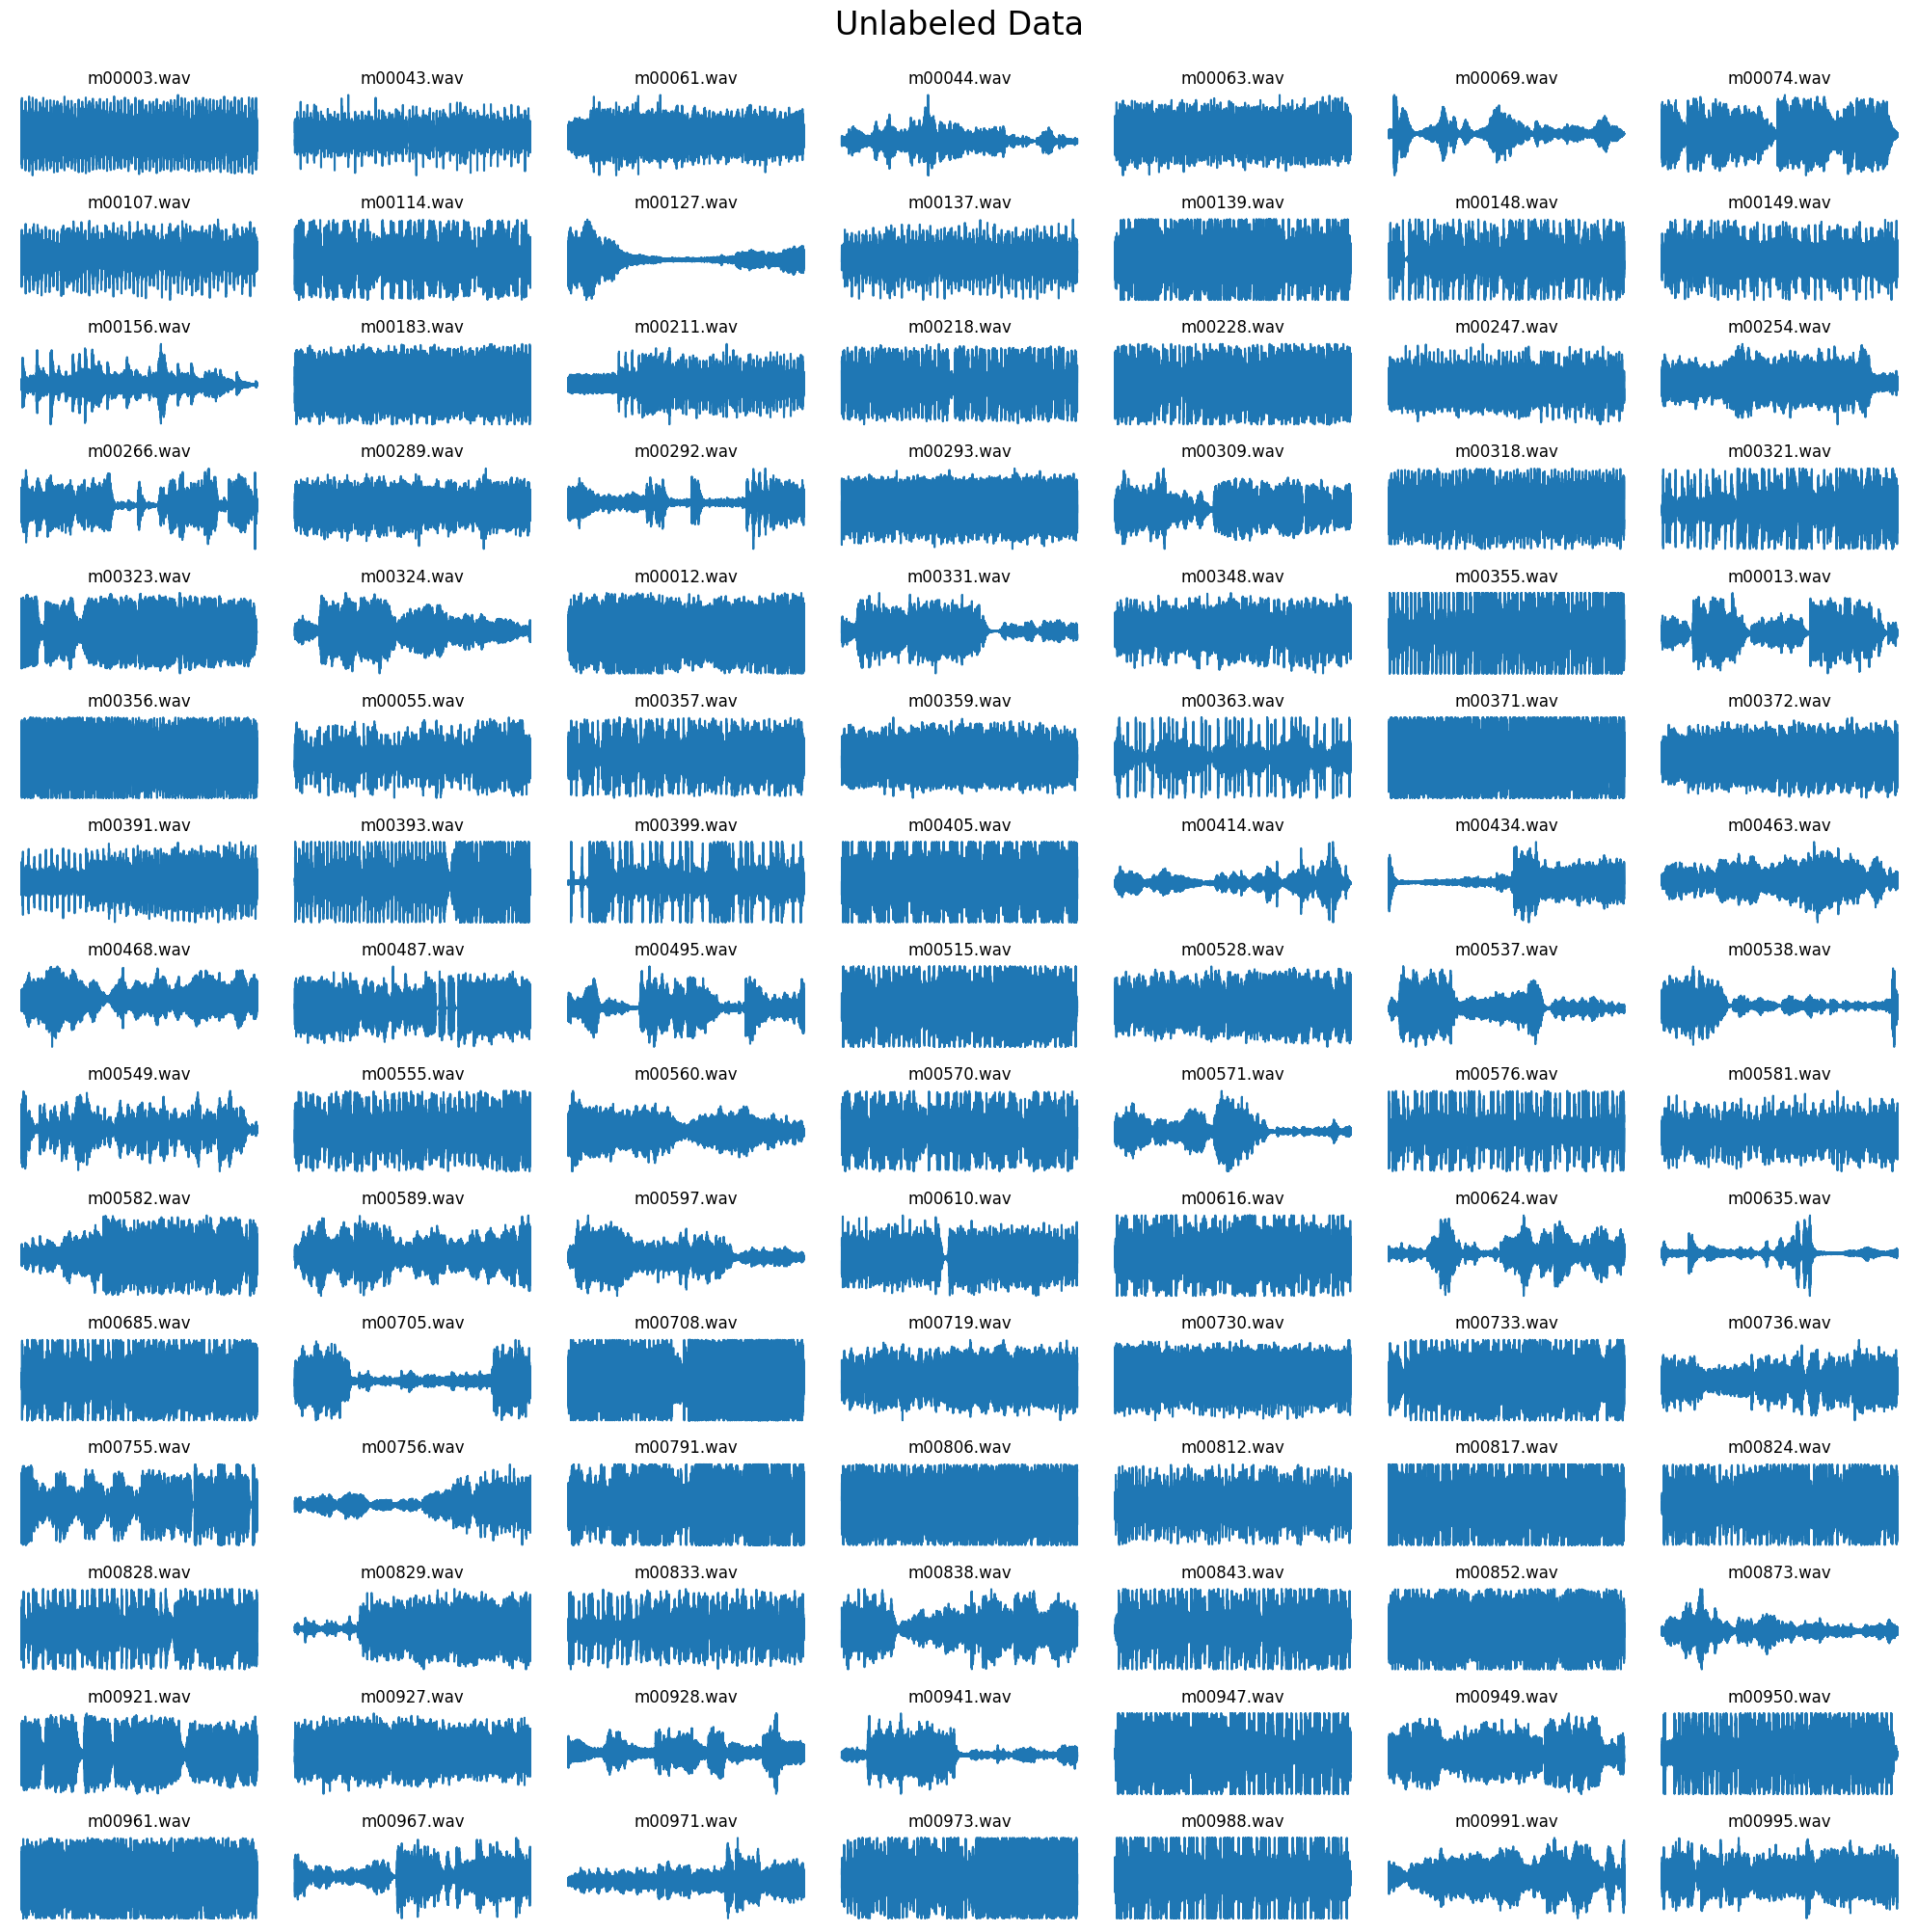

In [9]:
v_un = Visualizer(unlabeled_data, 'Unlabeled Data', 15, 7, figsize=(20, 20))
v_un.subplots()

In [10]:
print(labeled_files)

['m00002.wav', 'm00039.wav', 'm00041.wav', 'm00072.wav', 'm00096.wav', 'm00102.wav', 'm00112.wav', 'm00138.wav', 'm00192.wav', 'm00206.wav', 'm00230.wav', 'm00236.wav', 'm00248.wav', 'm00253.wav', 'm00298.wav', 'm00313.wav', 'm00338.wav', 'm00339.wav', 'm00351.wav', 'm00400.wav', 'm00421.wav', 'm00429.wav', 'm00435.wav', 'm00454.wav', 'm00477.wav', 'm00501.wav', 'm00503.wav', 'm00513.wav', 'm00553.wav', 'm00606.wav', 'm00623.wav', 'm00627.wav', 'm00629.wav', 'm00633.wav', 'm00637.wav', 'm00658.wav', 'm00671.wav', 'm00676.wav', 'm00677.wav', 'm00678.wav', 'm00716.wav', 'm00762.wav', 'm00772.wav', 'm00773.wav', 'm00801.wav', 'm00821.wav', 'm00850.wav', 'm00867.wav', 'm00895.wav', 'm00996.wav']


# 3. Feature Engineering

In [11]:

labeled_features_df = featureDataFrame(labeled_files, 'Datasets/labeled')
unlabeled_features_df = featureDataFrame(unlabeled_files, 'Datasets/unlabeled')

print("Labeled Features DataFrame")
print(labeled_features_df.head())

print("\nUnlabeled Features DataFrame")
print(unlabeled_features_df.head())

Labeled Features DataFrame
   spectral_centroid  spectral_bandwidth  zero_crossing_rate       rms  \
0        1451.862124         1920.270843            0.051224  0.050480   
1        1811.410394         2019.300257            0.072150  0.123665   
2        3110.898196         2992.010638            0.152857  0.198322   
3        2624.814629         2709.897108            0.120217  0.142927   
4        2549.269757         2485.524548            0.115834  0.184340   

   spectral_rolloff  mfcc_mean_1  mfcc_mean_2  mfcc_mean_3  chroma_mean_1  \
0       3047.431199  -298.756134   112.076279     6.488818       0.117655   
1       3854.851374  -169.153351   110.459999    -8.576200       0.412044   
2       6744.988603   -18.845390    71.325661    -3.766896       0.412797   
3       5605.777240   -69.630653    83.072273   -16.599928       0.286717   
4       5583.144894   -91.983772    87.640099    -2.066796       0.432902   

   chroma_mean_2                 tempo    filename  
0       0.13

Explanation: 

1. Spectral Centroid: 

    -Explanation:

    -Calculation:

    The mathematical formula is the following: 
    $$
    \text{Spectral Centroid} = \frac{\sum_{n=0}^{N-1} f(n)\,x(n)}{\sum_{n=0}^{N-1} x(n)}
    $$
2. Spectral Bandwith: 

    -Explanation:

    -Calculation:

    The mathematical formula is the following: 
    $$
    \text{Spectral Bandwidth} = \frac{\sum_{n=0}^{N-1} \left(f(n) - \text{Spectral Centroid}\right)^2 \cdot x(n)}{\sum_{n=0}^{N-1} x(n)}
    $$

3. Zero Crossing Rate: 

    -Explanation:

    -Calculation:

    The mathematical formula is the following: 
    $$
    \text{ZCR} = \frac{1}{T} \sum_{t=1}^{T} \mathbb{I}\left\{x(t-1) \cdot x(t) < 0\right\}
    $$  

4. RMS: 

    -Explanation:

    -Calculation:

    The mathematical formula is the following: 
    $$
    \text{RMS} = \sqrt{ \frac{1}{N} \sum_{n=1}^{N} \left(\text{amplitude}_n\right)^2 }
    $$

5. Spectral Rolloff:
    
    -Explanation:

    -Calculation:

    The mathematical formula is the following: 
    $$
    \text{Spectral Rolloff} = f(r) \quad \text{where} \quad \sum_{n=0}^{k} x(n) = r \cdot \sum_{n=0}^{N-1} x(n)
    $$

6. MFCC Means: 

    -Explanation:

    -Calculation:

    The mathematical formula is the following: 
    $$
    \text{MFCC}_i = \frac{1}{N} \sum_{n=0}^{N-1} \text{MFCC}(i, n)
    $$

7. Chroma Mean: 

    -Explanation:

    -Calculation:

    The mathematical formula is the following: 
    $$
    \text{Chroma Mean}_i = \frac{1}{N} \sum_{n=0}^{N-1} \text{Chroma}(i, n)
    $$

8. Tempo:
    
    -Explanation:

    -Calculation:

    The mathematical formula is the following: 
    $$
    \text{Tempo (BPM)} = \frac{60}{\text{Average Beat Interval (seconds)}}
    $$

9. Spectral Contrast Mean: 

    -Explanation:

    -Calculation:

    The mathematical formula is the following: 
    $$
    \text{Spectral Contrast}_i = \frac{\max(x_i) - \min(x_i)}{\max(x_i)}
    $$

10. Tonnetz: 

    -Explanation:

    -Calculation:

    The mathematical formula is the following: 
    $$
    \text{Tonnetz Mean}_i = \frac{1}{N} \sum_{n=0}^{N-1} \text{Tonnetz}(i, n)
    $$

11. Flatness:

    -Explanation:

    -Calculation:
    
    The mathematical formula is the following: 
    $$
    \text{Spectral Flatness} = \frac{\left( \prod_{n=0}^{N-1} x(n) \right)^{\frac{1}{N}}}{\frac{1}{N} \sum_{n=0}^{N-1} x(n)}
    $$

# 6. Conclusion